#### Disclaimer:
##### This Jupyter notebook contains the code from the neural neural series until video 8/9, but because of creating the dataset myself seems to have brought upon some issue so I used the nnfs library in the code given in the Neural-Network.py file
#### Please refer to the other file for a better understanding and working of the Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

Now we create a function to create the dataset required for the neural network

In [2]:
def create_data(points, classes):
    #initializing X and y datasets
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    
    return X, y    

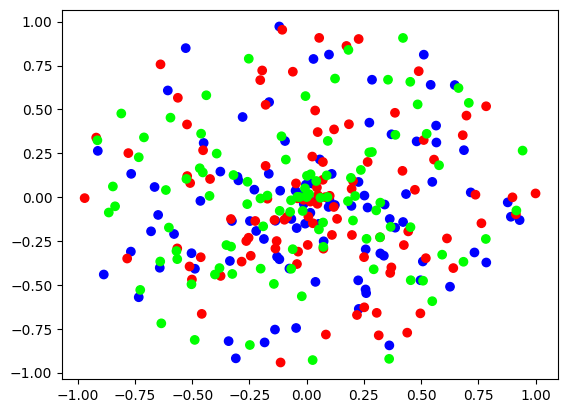

In [3]:
X, y = create_data(100, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

We have X and y as the data

In [4]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

Softmax activation function: Now we apply the softmax activation function

In [5]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        """we subtract max(inputs) from inputs becayse we may counter overflow error, 
        and by subtracting maximum from the whole array it will cause rest elements to be negative 
        which will be countered during exponentiation and will range in exp_values being from (0,1)"""
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        

Now we calculate the loss by Categorical Cross Entropy

In [6]:
class Loss:
    def calculate(self, output, y): #output is the output from the model and y is the intended target values
        sample_losses = self.forward((output, y))
        data_loss = np.mean(sample_losses)
        return data_loss

In [7]:
class Loss_CategoricalCrossentropy(Loss):
    def calculate(self, output, y_true):
        sample_losses = self.forward((output, y))
        data_loss = np.mean(sample_losses)
        return data_loss
    
    def forward(self, y_pred, y_true): #y_pred: values from NN; y_true: target training values
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) #a number close to 0, but not 0 due to infinity purposes
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [8]:
#Layer_Dense(number of inputs or number of features per sample whether it is going to fail or not, number of neurons)
#so in the spiral dataset, we have 2 unique features so n_inputs is 2
dense1 = Layer_Dense(2, 3)

#for ReLU Activation function, it takes inputs from all values for the neurons
activation1 = Activation_ReLU()

In [9]:
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [10]:
loss_function = Loss_CategoricalCrossentropy()

In [11]:
#we have the layer 1 defined, and now we will input it into the neural network
dense1.forward(X)

#now we will apply the activation function to layer 1 and the cost is reduced
activation1.forward(dense1.output)

In [12]:
dense2.forward(activation1.output)

activation2.forward(dense2.output)

In [13]:
loss = loss_function.calculate(activation2.output, y)

TypeError: Loss_CategoricalCrossentropy.forward() missing 1 required positional argument: 'y_true'